In [3]:
    #libraries import
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [32]:
# data read and types check
df = pd.read_csv("KO-KEGG\merged_output_withNA.tsv",sep = "\t",header = None)

df = df.T
colnames=df.iloc[0]
df.columns = colnames
df = df.drop(df.index[0])

print(df.shape)
print(df.dtypes)
df.head()

(124, 223)
0
KEGG       object
ko05340    object
ko00564    object
ko00680    object
ko00562    object
            ...  
ko00909    object
ko00905    object
ko04666    object
ko04640    object
ko04912    object
Length: 223, dtype: object


,KEGG,ko05340,ko00564,ko00680,ko00562,ko03030,ko00561,ko00440,ko00250,ko00740,...,ko00965,ko05131,ko04144,ko00062,ko00901,ko00909,ko00905,ko04666,ko04640,ko04912
1,S8.4.Gut,14007.5,110302.94,147043.18,25747.52,104327.96,66866.22,12596.34,163718.66,35518.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S8.5.Gut,13825.5,108900.72,143767.09,25335.01,116469.23,70930.86,13047.17,167884.58,30465.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S8.2.Gut,17289.25,132540.22,171467.59,31054.76,122604.23,80670.61,15949.92,192464.33,41607.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S8.3.Gut,18899.98,146341.42,186875.44,33138.62,145016.35,93333.18,17887.64,217143.64,43221.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,S9.80.Gut,14551.12,108833.22,147673.38,25295,87931.76,67850.92,10197.24,153852.12,39231.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# checking for uniformity of  records
df['KEGG'].value_counts().values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
# as we are missing one row from our Gut_s8 pond we will add it with values 0
# create zero row 
zeros_row = pd.DataFrame([[0] * len(df.columns)], columns=df.columns)
zeros_row['KEGG'] = 'S8.22.Gut'
# add zero row to dataframe
df = pd.concat([df, zeros_row], ignore_index=True)


In [34]:
# filling missing values with 0 
df = df.fillna(0)
df_2 = df 
df_2.iloc[:,1:] = df_2.iloc[:,1:].astype("float32")
df = df_2
df_2.head()

,KEGG,ko05340,ko00564,ko00680,ko00562,ko03030,ko00561,ko00440,ko00250,ko00740,...,ko00965,ko05131,ko04144,ko00062,ko00901,ko00909,ko00905,ko04666,ko04640,ko04912
0,S8.4.Gut,14007.5,110302.9375,147043.1875,25747.519531,104327.960938,66866.21875,12596.339844,163718.65625,35518.039062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,S8.5.Gut,13825.5,108900.71875,143767.09375,25335.009766,116469.226562,70930.859375,13047.169922,167884.578125,30465.519531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,S8.2.Gut,17289.25,132540.21875,171467.59375,31054.759766,122604.226562,80670.609375,15949.919922,192464.328125,41607.519531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,S8.3.Gut,18899.980469,146341.421875,186875.4375,33138.621094,145016.34375,93333.179688,17887.640625,217143.640625,43221.988281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,S9.80.Gut,14551.120117,108833.21875,147673.375,25295.0,87931.757812,67850.921875,10197.240234,153852.125,39231.820312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
print(df.shape)
df.describe()

(125, 223)


,KEGG,ko05340,ko00564,ko00680,ko00562,ko03030,ko00561,ko00440,ko00250,ko00740,...,ko00965,ko05131,ko04144,ko00062,ko00901,ko00909,ko00905,ko04666,ko04640,ko04912
count,125,125.0,125.0000,125.0000,125.000000,125.000000,125.00000,125.000000,125.00000,125.000000,...,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0
unique,125,125.0,125.0000,125.0000,125.000000,125.000000,125.00000,125.000000,125.00000,125.000000,...,24.0,7.0,12.0,11.0,10.0,3.0,3.0,8.0,8.0,8.0
top,S8.4.Gut,14007.5,110302.9375,147043.1875,25747.519531,104327.960938,66866.21875,12596.339844,163718.65625,35518.039062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1,1.0,1.0000,1.0000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,...,81.0,119.0,110.0,112.0,114.0,123.0,123.0,114.0,114.0,114.0


Becouse we have a lot of big numbers and a lot of variation between collumns we might try to normalise the data for better results, on the other hand we could also not normalise so itll be easier for model to discover differences between bacteria abduance as a predictor value. our next steps are:
- plot our data to see for any outliers (ask prof) ew. outlier treatment 
- convert classification variable (target variable)
- create predictors and target varaiable sets
- normalise predictors set 

## Data formatting and normalisation

In [8]:
# replacing zeroes with small number
df.iloc[:,1:] = df.iloc[:,1:].replace(0,0.00001)

In [9]:
#normalisation by collumns
#df[predictors]=df[predictors]/df[predictors].max()

#normalisation by rows but only for not aggregated  data (not used now)
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda row: row / row.max(axis=0), axis=0)

#checksum
#df.iloc[1,1:].sum()

## conversion of class variable


Explanation of pond coding
| number | setup | pond numbers | water supplementation | feed suplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|

In [36]:
#creting decoder 

def pond_decoder(x):
    codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]}
    x=x.replace('S','')
    num = int(x.split(".")[0])
    
    
    for key, value_list in codes.items():
        if num in value_list:
            return key
    
    return None   
pond_decoder("S9.80.Gut")

3

## grouping data (not used not succesfull)
We want to change our current dataset so in cells it has lists of bacteria abduance with elemets from samples for each pond

In [163]:
#grouping values based on pond and aggregating them to list in cells 
df_l=df.groupby('pond').agg(lambda x: x.tolist())
df_l.reset_index(inplace=True)
df_l

C:\Users\marek\AppData\Local\Temp\ipykernel_17688\3554832122.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_l.reset_index(inplace=True)


,pond,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
0,Gut_S10,"[2319.0, 3391.0, 1338.0, 1582.0, 1463.0]","[2187.0, 2071.0, 7053.0, 15595.0, 3891.0]","[1743.0, 355.0, 669.0, 124.0, 541.0]","[500.0, 1054.0, 279.0, 503.0, 7.0]","[521.0, 1024.0, 329.0, 309.0, 13.0]","[286.0, 1952.0, 63.0, 5.0, 11.0]","[366.0, 66.0, 52.0, 3418.0, 61.0]","[612.0, 217.0, 1338.0, 326.0, 398.0]","[160.0, 95.0, 139.0, 76.0, 4.0]",...,"[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]"
1,Gut_S11,"[1185.0, 521.0, 44.0, 664.0, 757.0]","[7411.0, 3008.0, 10931.0, 8023.0, 3766.0]","[283.0, 193.0, 66.0, 356.0, 395.0]","[22.0, 77.0, 10.0, 201.0, 100.0]","[148.0, 808.0, 19.0, 453.0, 131.0]","[34.0, 106.0, 3.0, 59.0, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[693.0, 192.0, 179.0, 278.0, 1119.0]","[50.0, 80.0, 4.0, 262.0, 28.0]",...,"[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]"
2,Gut_S12,"[383.0, 258.0, 220.0, 824.0, 1413.0]","[5355.0, 16274.0, 10682.0, 4982.0, 6013.0]","[251.0, 84.0, 85.0, 88.0, 55.0]","[106.0, 95.0, 123.0, 282.0, 358.0]","[38.0, 36.0, 56.0, 114.0, 507.0]","[1e-05, 1e-05, 1e-05, 30.0, 1e-05]","[213.0, 1e-05, 1e-05, 48.0, 325.0]","[20.0, 462.0, 187.0, 32.0, 211.0]","[5.0, 3.0, 5.0, 21.0, 163.0]",...,"[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]"
3,Gut_S13,"[1741.0, 854.0, 444.0, 1272.0, 396.0]","[3143.0, 1173.0, 4662.0, 4215.0, 5567.0]","[163.0, 514.0, 138.0, 348.0, 197.0]","[238.0, 141.0, 38.0, 31.0, 49.0]","[565.0, 34

In [212]:
df_l['pond'] = df_l['pond'].apply(lambda x: pond_decoder(x))
df_l['pond'] = df_l['pond'].astype('category')

## Creating X and y

In [39]:
print(df.shape)
df.tail()

(125, 223)


,KEGG,ko05340,ko00564,ko00680,ko00562,ko03030,ko00561,ko00440,ko00250,ko00740,...,ko00965,ko05131,ko04144,ko00062,ko00901,ko00909,ko00905,ko04666,ko04640,ko04912
120,S32.73.Gut,14790.25,123736.1875,148050.1875,18689.080078,132018.515625,89007.296875,7374.740234,186244.96875,57747.929688,...,0.0,3.72,3.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,S32.72.Gut,8609.860352,68135.296875,100486.039062,12440.19043,65381.25,45692.148438,6406.540039,101287.507812,29035.929688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,S32.75.Gut,7553.470215,83516.789062,126634.679688,11049.459961,93353.84375,50052.351562,2431.969971,125494.703125,39925.921875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,S32.74.Gut,7883.540039,58946.179688,82612.476562,9036.230469,58041.859375,38942.230469,4435.240234,86281.023438,25553.609375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,S8.22.Gut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# creation of X and y 
X = df.iloc[:,1:].to_numpy().astype('float32')
X=X.reshape(125,1,222,1)
y=df['KEGG'].unique()
print(X.shape,y.shape)


(125, 1, 222, 1) (125,)


array(['S8.4.Gut', 'S8.5.Gut', 'S8.2.Gut', 'S8.3.Gut', 'S9.80.Gut',
       'S9.79.Gut', 'S9.77.Gut', 'S9.78.Gut', 'S9.76.Gut', 'S10.54.Gut',
       'S10.55.Gut', 'S10.52.Gut', 'S10.53.Gut', 'S10.51.Gut',
       'S11.104.Gut', 'S11.105.Gut', 'S11.101.Gut', 'S11.103.Gut',
       'S11.102.Gut', 'S12.28.Gut', 'S12.26.Gut', 'S12.27.Gut',
       'S12.29.Gut', 'S12.30.Gut', 'S13.83.Gut', 'S13.81.Gut',
       'S13.85.Gut', 'S13.82.Gut', 'S13.84.Gut', 'S14.8.Gut', 'S14.7.Gut',
       'S14.10.Gut', 'S14.9.Gut', 'S14.6.Gut', 'S15.106.Gut',
       'S15.109.Gut', 'S15.108.Gut', 'S15.107.Gut', 'S15.110.Gut',
       'S16.32.Gut', 'S16.35.Gut', 'S16.34.Gut', 'S16.31.Gut',
       'S16.33.Gut', 'S17.88.Gut', 'S17.87.Gut', 'S17.89.Gut',
       'S17.90.Gut', 'S17.86.Gut', 'S18.15.Gut', 'S18.14.Gut',
       'S18.13.Gut', 'S18.11.Gut', 'S18.12.Gut', 'S19.38.Gut',
       'S19.39.Gut', 'S19.37.Gut', 'S19.40.Gut', 'S19.36.Gut',
       'S20.91.Gut', 'S20.93.Gut', 'S20.92.Gut', 'S20.94.Gut',
       'S20.95.Gut',

In [46]:
# converting y to experimental setups 

y = np.array([pond_decoder(yi) for yi in y])
type(y)


AttributeError: 'numpy.int32' object has no attribute 'replace'

In [48]:
y=y.reshape(125,1)
y

array([[0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [1],
       [1],
       [1],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [4],
       [4],
       [4],
       [4],
       [4],
       [1],
       [1],
       [1],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

## Splitting data into train and test sets

In [53]:
#cahnging to category variable
y = pd.DataFrame(y,columns = ['setup'])
y['setup']=y['setup'].astype('category')


,setup
0,0
1,0
2,0
3,0
4,3
...,...
120,2
121,2
122,2
123,2


In [55]:
# creating test train and validation set 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111,stratify = y)
#X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.33, random_state = 111, stratify =y_test_val)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(100, 1, 222, 1) (25, 1, 222, 1) (100, 1) (25, 1)


At this point we should have test set with size of 25 and training set with size of 100 ready for later moddeling 

# Model building, compiling, fitting

My initial strategy as we have not much data is to have some more dropout to prevent overfitting and lower learning rate as well as more epochs to compensate for dropout.
- For loss function we will use [caterogical crossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) as we have several labeled categories
- For metrics we will use [sparse caterogical crossentropy](https://keras.io/api/metrics/probabilistic_metrics/#categoricalcrossentropy-class) as it works well with our integer mutliclass predictor variable
- For optimizer we will chose Adam as it is an usual choice [optimzier choosing](https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e) we will set small learning rate at beggining but it might be that our network will rapidly stop learning becouse of that, in that case it is neccesary to update learning rate to bigger number
- As in this approach we will be building CNN's we will have one 1 dimensional convolutional layer
- No maxpooling layer as we dont want to lose information about position and as it is for temporal data 

## model building and compiling
for now we will build model with 3 hidedn layers with sigmoid activation function as we have no values below zero/one so relu would just predict linear, also one dropout layer and one output layer with softmax activation function.

In [173]:
model1 = keras.Sequential()



model1.add(keras.layers.Conv1D(filters=5, kernel_size=3, activation='relu',input_shape = (1,222,1)))
model1.add(keras.layers.Conv1D(filters=1, kernel_size=3, activation='relu'))


#model1.add(keras.layers.MaxPooling1D(pool_size = 4))



#model1.add(keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu'))
#model1.add(keras.layers.Dense(20, activation = 'relu'))

#model1.add(keras.layers.MaxPooling1D(pool_size = 4))



model1.add(keras.layers.Dense(10, activation = 'relu'))
#model1.add(keras.layers.Dropout(rate = 0.25))
model1.add(keras.layers.Dense(5, activation = 'relu'))

model1.add(Flatten())

model1.add(keras.layers.Dense(5, activation ='softmax'))

model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 1, 220, 5)         20        
                                                                 
 conv1d_20 (Conv1D)          (None, 1, 218, 1)         16        
                                                                 
 dense_28 (Dense)            (None, 1, 218, 10)        20        
                                                                 
 dense_29 (Dense)            (None, 1, 218, 5)         55        
                                                                 
 flatten_9 (Flatten)         (None, 1090)              0         
                                                                 
 dense_30 (Dense)            (None, 5)                 5455      
                                                                 
Total params: 5566 (21.74 KB)
Trainable params: 5566 (

In [174]:
loss = "sparse_categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = "accuracy"
# worth trying same loss as metrics
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model1.compile(optimizer = optimizer, loss = loss, metrics=metrics)

In [175]:
x = np.random.rand(3,10,1)
print(x)
x.shape

[[[0.30195053]
  [0.89229208]
  [0.89712636]
  [0.83314773]
  [0.85321319]
  [0.02883113]
  [0.54114069]
  [0.70392745]
  [0.07802584]
  [0.65370962]]

 [[0.01235166]
  [0.84102119]
  [0.02498264]
  [0.36506964]
  [0.17031079]
  [0.21746715]
  [0.09547611]
  [0.8219672 ]
  [0.21089622]
  [0.77057883]]

 [[0.40243259]
  [0.91273196]
  [0.02094735]
  [0.44351412]
  [0.6347867 ]
  [0.63178128]
  [0.79145142]
  [0.89473454]
  [0.79090152]
  [0.15992415]]]


(3, 10, 1)

In [176]:

 y = keras.layers.Conv1D(filters=1, kernel_size=5,padding='same')(x)
 yy = keras.layers 
 #print(y.shape)
print(y)

tf.Tensor(
[[[ 1.32592618e-01]
  [-1.89771414e-01]
  [-4.42116559e-01]
  [-8.31548333e-01]
  [ 6.21071458e-02]
  [-6.79935813e-02]
  [-7.75052533e-02]
  [-6.74724579e-04]
  [-6.67967916e-01]
  [ 1.58725023e-01]]

 [[-4.59117174e-01]
  [ 1.68196425e-01]
  [-6.78664923e-01]
  [ 3.43252867e-01]
  [-3.19498390e-01]
  [ 5.58126628e-01]
  [-4.06437576e-01]
  [ 3.92280936e-01]
  [-1.00646782e+00]
  [ 9.90619138e-02]]

 [[-5.39959967e-01]
  [-5.67530096e-02]
  [-2.75244713e-01]
  [ 4.11706001e-01]
  [-1.38773203e-01]
  [-1.22648895e-01]
  [-1.96223438e-01]
  [-7.31605828e-01]
  [-4.94092643e-01]
  [-2.28481054e-01]]], shape=(3, 10, 1), dtype=float32)


## model fiting 

as we said before we will try to use much epochs and see the results

In [177]:

history1=model1.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 5, validation_data = (X_test, y_test))# validation_data=(X_val, y_val))


Epoch 1/500
20/20 [==============================] - 3s 39ms/step - loss: 13654.2373 - accuracy: 0.2000 - val_loss: 8162.0464 - val_accuracy: 0.2000
Epoch 2/500
20/20 [==============================] - 0s 12ms/step - loss: 9842.9268 - accuracy: 0.1500 - val_loss: 5985.8706 - val_accuracy: 0.2000
Epoch 3/500
20/20 [==============================] - 0s 11ms/step - loss: 7242.6426 - accuracy: 0.1600 - val_loss: 4320.0894 - val_accuracy: 0.2800
Epoch 4/500
20/20 [==============================] - 0s 12ms/step - loss: 5643.1279 - accuracy: 0.2200 - val_loss: 3239.1855 - val_accuracy: 0.3200
Epoch 5/500
20/20 [==============================] - 0s 12ms/step - loss: 4625.9683 - accuracy: 0.1800 - val_loss: 2774.2180 - val_accuracy: 0.2000
Epoch 6/500
20/20 [==============================] - 0s 12ms/step - loss: 3993.4097 - accuracy: 0.1400 - val_loss: 2352.6951 - val_accuracy: 0.2400
Epoch 7/500
20/20 [==============================] - 0s 12ms/step - loss: 3424.9019 - accuracy: 0.1900 - val_lo

# model evaluation

In [178]:
y_pred = model1.predict(X)

print(y_pred[:1])
# we need to convert those to classes 
y_pred_class = y_pred.argmax(axis=1)
print(y_pred_class[:1])

4/4 [==============================] - 0s 8ms/step
[[1. 0. 0. 0. 0.]]
[0]


In [179]:
print(y_pred_class)
y

[0 0 0 0 4 3 3 3 3 2 2 2 2 2 4 4 3 4 2 4 0 0 0 1 4 3 4 4 4 0 0 0 0 0 0 4 4
 4 3 0 0 1 1 1 3 0 0 0 0 0 4 0 4 0 0 0 4 4 4 3 4 4 3 3 2 2 1 4 4 4 4 4 4 4
 0 0 4 0 0 0 0 0 0 0 4 4 4 4 4 2 1 1 0 3 3 3 3 3 3 2 2 4 2 3 2 2 0 2 0 2 2
 4 2 3 2 4 4 4 4 2 2 4 2 4 4]


<tf.Tensor: shape=(3, 10, 1), dtype=float32, numpy=
array([[[ 1.32592618e-01],
        [-1.89771414e-01],
        [-4.42116559e-01],
        [-8.31548333e-01],
        [ 6.21071458e-02],
        [-6.79935813e-02],
        [-7.75052533e-02],
        [-6.74724579e-04],
        [-6.67967916e-01],
        [ 1.58725023e-01]],

       [[-4.59117174e-01],
        [ 1.68196425e-01],
        [-6.78664923e-01],
        [ 3.43252867e-01],
        [-3.19498390e-01],
        [ 5.58126628e-01],
        [-4.06437576e-01],
        [ 3.92280936e-01],
        [-1.00646782e+00],
        [ 9.90619138e-02]],

       [[-5.39959967e-01],
        [-5.67530096e-02],
        [-2.75244713e-01],
        [ 4.11706001e-01],
        [-1.38773203e-01],
        [-1.22648895e-01],
        [-1.96223438e-01],
        [-7.31605828e-01],
        [-4.94092643e-01],
        [-2.28481054e-01]]], dtype=float32)>

In [180]:
print(model1.evaluate(X_train,y_train))
print(model1.evaluate(X_test,y_test))

4/4 [==============================] - 1s 8ms/step - loss: 14.4520 - accuracy: 0.7000
[14.45202350616455, 0.699999988079071]
1/1 [==============================] - 0s 60ms/step - loss: 146.5390 - accuracy: 0.2000
[146.5390167236328, 0.20000000298023224]


In [181]:
history1.history.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

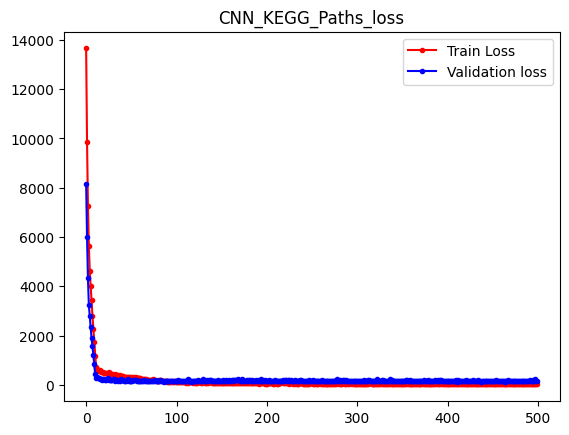

In [182]:
title = "CNN_KEGG_Paths_loss"
fig, ax = plt.subplots()
ax.plot(history1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(history1.history["val_loss"],'b', marker='.', label="Validation loss")
plt.title(title)
ax.legend()
#plt.savefig(title+'.png')

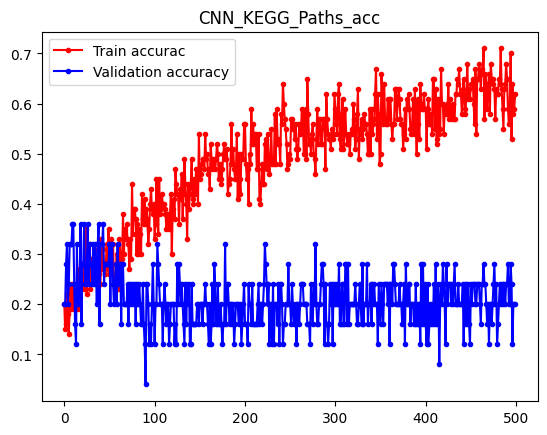

In [183]:
title = "CNN_KEGG_Paths_acc"
fig, ax = plt.subplots()
ax.plot(history1.history["accuracy"],'r', marker='.', label="Train accurac")
ax.plot(history1.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.title(title)
ax.legend()
#plt.savefig(title+'.png')